## Data Preprocessing

In [99]:
import pandas as pd
import statistics as s
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.optimize as optimize
import math
from scipy.stats import skew
import numpy as np
from prettytable import PrettyTable
from scipy.stats import kurtosis
import matplotlib.dates as mdates

In [100]:
data2 = pd.read_csv("DGS2.csv")

In [101]:
data5 = pd.read_csv("DGS5.csv")

In [102]:
data10 = pd.read_csv("DGS10.csv")

In [103]:
dgs2 = data2.dropna(axis=0)

In [104]:
dgs5 = data5.dropna(axis=0)

In [105]:
dgs10 = data10.dropna(axis=0)

In [106]:
dgs2.isnull().sum()

observation_date    0
DGS2                0
dtype: int64

In [107]:
dgs5.isnull().sum()

observation_date    0
DGS5                0
dtype: int64

In [108]:
dgs10.isnull().sum()

observation_date    0
DGS10               0
dtype: int64

# Working with 2 Year Maturity Period Data

In [109]:
dgs2.head()

,observation_date,DGS2
0,1/4/1982,13.87
1,1/5/1982,14.09
2,1/6/1982,14.19
3,1/7/1982,14.33
4,1/8/1982,14.11


In [110]:
dgs2['DGS2']=dgs2['DGS2']/100

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [111]:
a=[]

In [112]:
#Calculating Maturity Price

for items in dgs2['DGS2']:
    matprice= 1000/((1+items)**2)
    a.append(matprice)

In [113]:
dgs2['Maturity Price']=a

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
dgs2.head()

,observation_date,DGS2,Maturity Price
0,1/4/1982,0.1387,771.225461
1,1/5/1982,0.1409,768.254017
2,1/6/1982,0.1419,766.909035
3,1/7/1982,0.1433,765.031985
4,1/8/1982,0.1411,767.984738


In [115]:
#Summary Statistics for Interest Rate

dgs2['DGS2'].describe()

count    9097.000000
mean        0.047137
std         0.033913
min         0.001600
25%         0.014500
50%         0.047100
75%         0.068000
max         0.151800
Name: DGS2, dtype: float64

In [116]:
#Calculating Mean, Standard Deviation and Variance for Interest Rate

mean2 = s.mean(dgs2['DGS2'])
std2 = s.stdev(dgs2['DGS2'])
var2 = s.variance(dgs2['DGS2'])

In [117]:
mean2, std2, var2

(0.047136572496427394, 0.03391343629309883, 0.0011501211612060728)

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


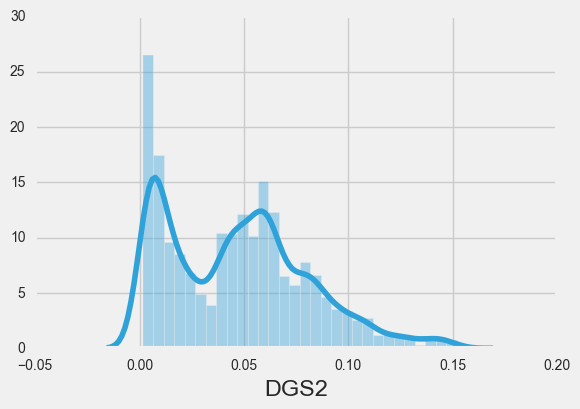

In [280]:
#Plotting Interest Rate to check for suitable distribution

sns.distplot(dgs2['DGS2'])

In [121]:
#Plotting Interest Rates on Normal Distribution

pdf2Yr = stats.norm.pdf(dgs2['DGS2'], mean2, std2)

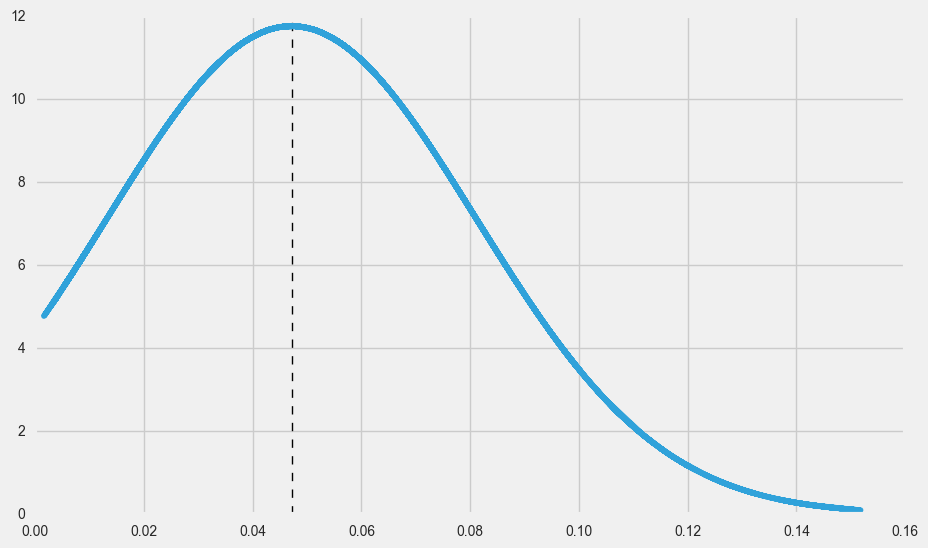

In [281]:
plt.rcParams["figure.figsize"] = (10,6)
plt.axvline(dgs2['DGS2'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.plot(dgs2['DGS2'],pdf2Yr)

# Log Normal Distribution for 2 Year Maturity Price

In [123]:
temp=[]

In [124]:
dgs2['Return2Year']=dgs2['Maturity Price'].shift(1)/dgs2['Maturity Price']

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [125]:
dgs2.head()

,observation_date,DGS2,Maturity Price,Return2Year
0,1/4/1982,0.1387,771.225461,NaN
1,1/5/1982,0.1409,768.254017,1.003868
2,1/6/1982,0.1419,766.909035,1.001754
3,1/7/1982,0.1433,765.031985,1.002454
4,1/8/1982,0.1411,767.984738,0.996155


In [126]:
DGS2 = dgs2.dropna(axis=0)

In [127]:
DGS2.head()

,observation_date,DGS2,Maturity Price,Return2Year
1,1/5/1982,0.1409,768.254017,1.003868
2,1/6/1982,0.1419,766.909035,1.001754
3,1/7/1982,0.1433,765.031985,1.002454
4,1/8/1982,0.1411,767.984738,0.996155
5,1/11/1982,0.1455,762.096230,1.007727


In [128]:
for items in DGS2['Return2Year']:
    k= math.log(items,2.71828)
    temp.append(k)

In [129]:
DGS2['LogReturn2Year']=temp

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [130]:
DGS2.head()

,observation_date,DGS2,Maturity Price,Return2Year,LogReturn2Year
1,1/5/1982,0.1409,768.254017,1.003868,0.003860
2,1/6/1982,0.1419,766.909035,1.001754,0.001752
3,1/7/1982,0.1433,765.031985,1.002454,0.002451
4,1/8/1982,0.1411,767.984738,0.996155,-0.003852
5,1/11/1982,0.1455,762.096230,1.007727,0.007697


In [131]:
DGS2['LogReturn2Year'].describe()

count    9096.000000
mean       -0.000023
std         0.001247
min        -0.015483
25%        -0.000577
50%         0.000000
75%         0.000566
max         0.013957
Name: LogReturn2Year, dtype: float64

In [132]:
from scipy.stats import kurtosis, skew

In [133]:
DGS2['LogReturn2Year'].kurtosis()

11.145411015431531

In [134]:
DGS2['LogReturn2Year'].skew()

-0.42682972729455043

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


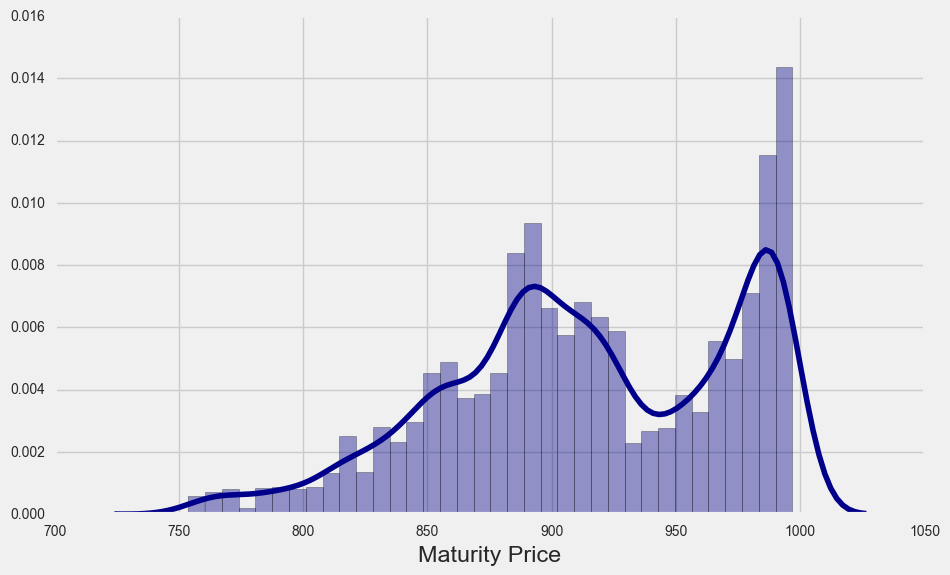

In [282]:

sns.distplot(DGS2['Maturity Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


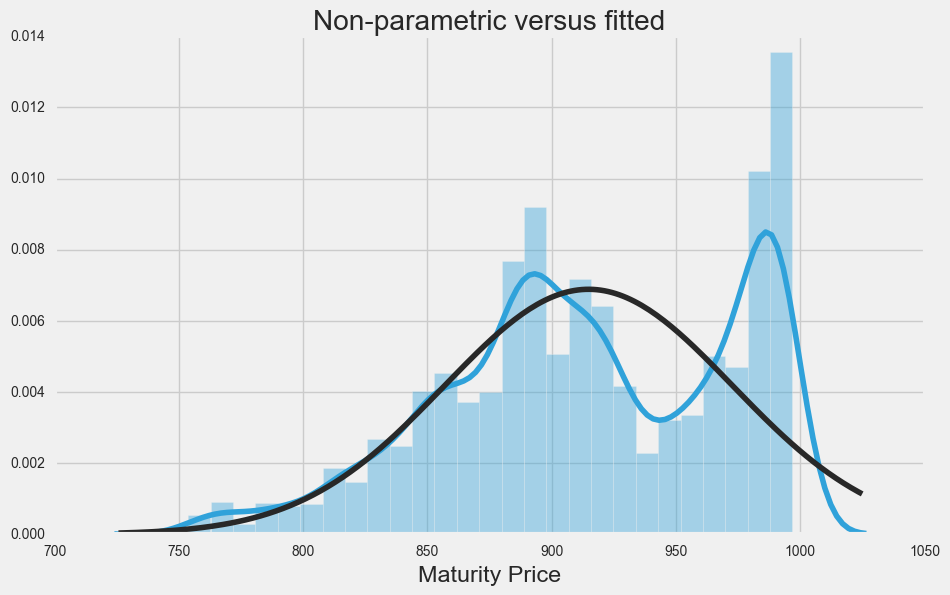

In [283]:
plt.title("Non-parametric versus fitted")
#plt.axvline(dgs2['DGS2'].mean(), color='k', linestyle='dashed', linewidth=1)
sns.distplot(DGS2['Maturity Price'], kde=True, fit=stats.norm)

# Working with 5 Year Maturity Period Data


In [137]:
dgs5.head()

,observation_date,DGS5
0,1/4/1982,14.15
1,1/5/1982,14.41
2,1/6/1982,14.60
3,1/7/1982,14.66
4,1/8/1982,14.47


In [138]:
dgs5['DGS5']=dgs5['DGS5']/100

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [139]:
b=[]

In [140]:
for items in dgs5['DGS5']:
    matprice= 1000/((1+items)**5)
    b.append(matprice)

In [141]:
dgs5['Maturity Price']=b

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [142]:
dgs5.head()

,observation_date,DGS5,Maturity Price
0,1/4/1982,0.1415,515.965212
1,1/5/1982,0.1441,510.129069
2,1/6/1982,0.1460,505.914249
3,1/7/1982,0.1466,504.591944
4,1/8/1982,0.1447,508.793537


In [143]:
#Summary Statistics for Interest Rate

dgs5['DGS5'].describe()

count    9097.000000
mean        0.053185
std         0.032087
min         0.005600
25%         0.025100
50%         0.050600
75%         0.073100
max         0.150200
Name: DGS5, dtype: float64

In [144]:
#Mean, Standard Deviation and Variance for 5 Year Interest Rate

mean5 =s.mean(dgs5['DGS5'])
std5 = s.stdev(dgs5['DGS5'])
var5 = s.variance(dgs5['DGS5'])

In [145]:
mean5, var5, std5

(0.053184885126964933, 0.0010296016085867368, 0.03208740576280259)

In [146]:
pdf5Yr = stats.norm.pdf(dgs5['DGS5'], mean5, std5) #Probability Distribution Function for 5 Year Interest Rates

In [147]:
plt.rcParams["figure.figsize"] = (10,6)
plt.axvline(dgs5['DGS5'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.plot(dgs5['DGS5'],pdf5Yr)

In [148]:
dgs5['Return5Year']=dgs5['Maturity Price'].shift(1)/dgs5['Maturity Price']

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [149]:
dgs5.head()

,observation_date,DGS5,Maturity Price,Return5Year
0,1/4/1982,0.1415,515.965212,NaN
1,1/5/1982,0.1441,510.129069,1.011441
2,1/6/1982,0.1460,505.914249,1.008331
3,1/7/1982,0.1466,504.591944,1.002621
4,1/8/1982,0.1447,508.793537,0.991742


In [150]:
DGS5= dgs5.dropna(axis=0)

In [151]:
DGS5.head()

,observation_date,DGS5,Maturity Price,Return5Year
1,1/5/1982,0.1441,510.129069,1.011441
2,1/6/1982,0.1460,505.914249,1.008331
3,1/7/1982,0.1466,504.591944,1.002621
4,1/8/1982,0.1447,508.793537,0.991742
5,1/11/1982,0.1483,500.867873,1.015824


In [152]:
v=[]

In [153]:
for i in DGS5['Return5Year']:
    g=math.log(i,2.71828)
    v.append(g)

In [154]:
DGS5['LogReturn5Year']=v

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [155]:
DGS5.head()

,observation_date,DGS5,Maturity Price,Return5Year,LogReturn5Year
1,1/5/1982,0.1441,510.129069,1.011441,0.011376
2,1/6/1982,0.1460,505.914249,1.008331,0.008297
3,1/7/1982,0.1466,504.591944,1.002621,0.002617
4,1/8/1982,0.1447,508.793537,0.991742,-0.008292
5,1/11/1982,0.1483,500.867873,1.015824,0.015700


In [156]:
DGS5['LogReturn5Year'].describe()

count    9096.000000
mean       -0.000057
std         0.003259
min        -0.035219
25%        -0.001869
50%         0.000000
75%         0.001480
max         0.024014
Name: LogReturn5Year, dtype: float64

In [157]:
DGS5['LogReturn5Year'].kurtosis()

5.5027388744122918

In [158]:
DGS5['LogReturn5Year'].skew()

-0.2039115076078985

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


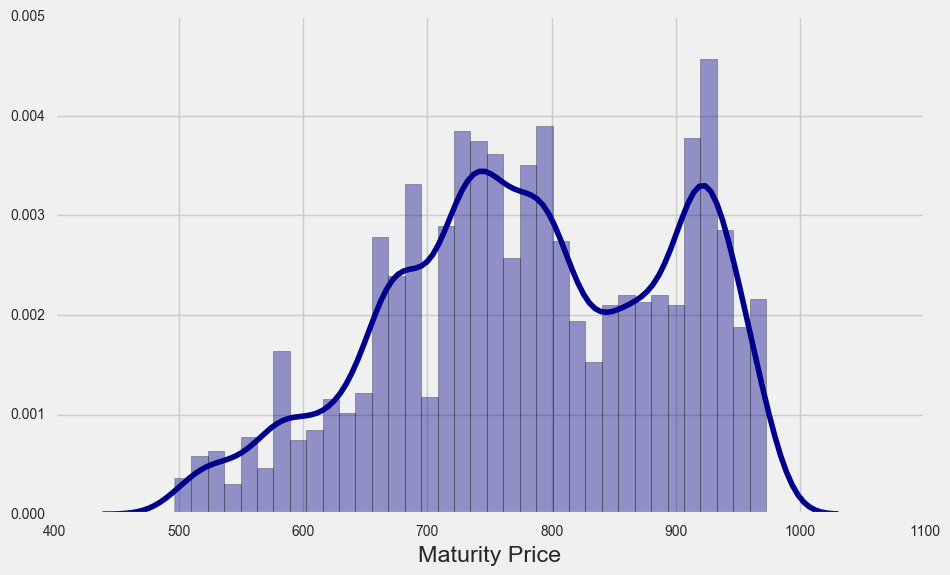

In [284]:

sns.distplot(DGS5['Maturity Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


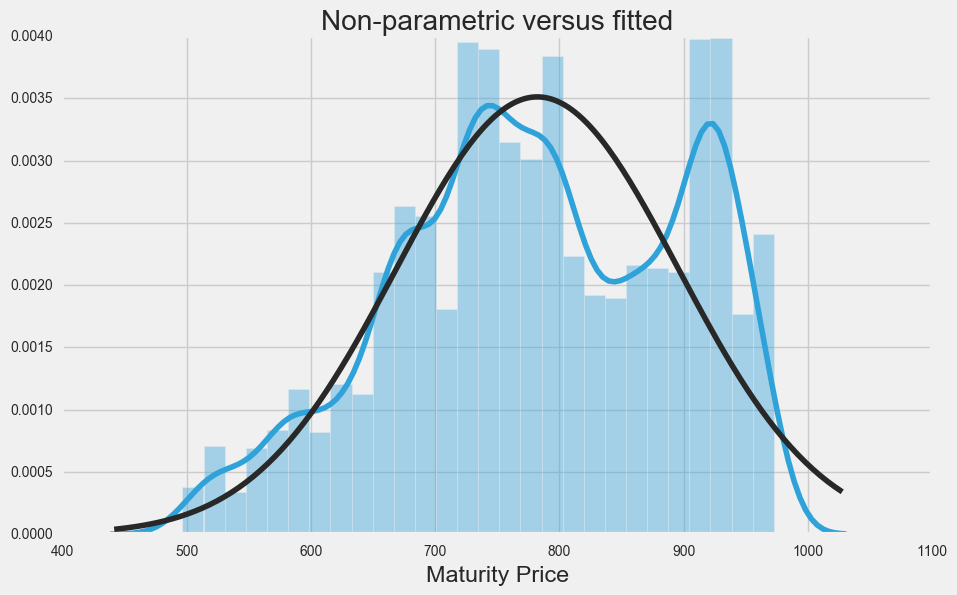

In [285]:
plt.title("Non-parametric versus fitted")
sns.distplot(DGS5['Maturity Price'], kde=True, fit=stats.norm)

# Working with 10 Year Maturity Period Data¶

In [161]:
dgs10.head()

,observation_date,DGS10
0,1/4/1982,14.19
1,1/5/1982,14.44
2,1/6/1982,14.59
3,1/7/1982,14.63
4,1/8/1982,14.48


In [162]:
dgs10['DGS10']=dgs10['DGS10']/100

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [163]:
c=[]

In [164]:
for items in dgs10['DGS10']:
    matprice= 1000/((1+items)**10)
    c.append(matprice)

In [165]:
dgs10['Matured Price']=c

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [166]:
dgs10.head()

,observation_date,DGS10,Matured Price
0,1/4/1982,0.1419,265.289017
1,1/5/1982,0.1444,259.550284
2,1/6/1982,0.1459,256.172676
3,1/7/1982,0.1463,255.280167
4,1/8/1982,0.1448,258.644824


In [167]:
dgs10['DGS10'].describe()

count    9097.000000
mean        0.058216
std         0.029746
min         0.013700
25%         0.035600
50%         0.054000
75%         0.076400
max         0.149500
Name: DGS10, dtype: float64

In [168]:
mean10 = s.mean(dgs10['DGS10'])
var10 = s.variance(dgs10['DGS10'])
std10 = s.stdev(dgs10['DGS10'])

In [169]:
mean10, var10, std10

(0.058215895350115419, 0.00088482810482985632, 0.029746060324517872)

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


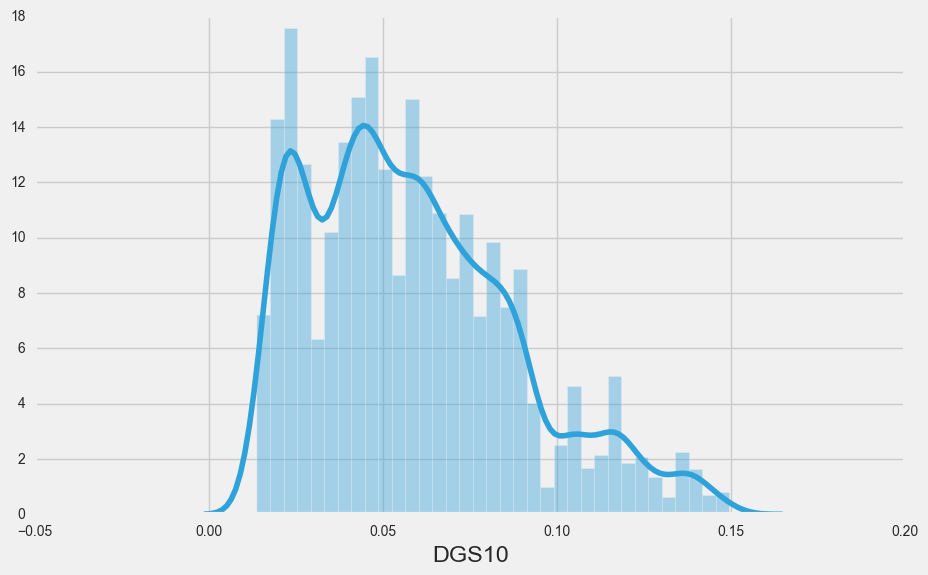

In [286]:
sns.distplot(dgs10['DGS10'])

In [171]:
pdf10Yr = stats.norm.pdf(dgs10['DGS10'], mean10, std10) #Probability Distribution Function for 10 Year Interest Rates

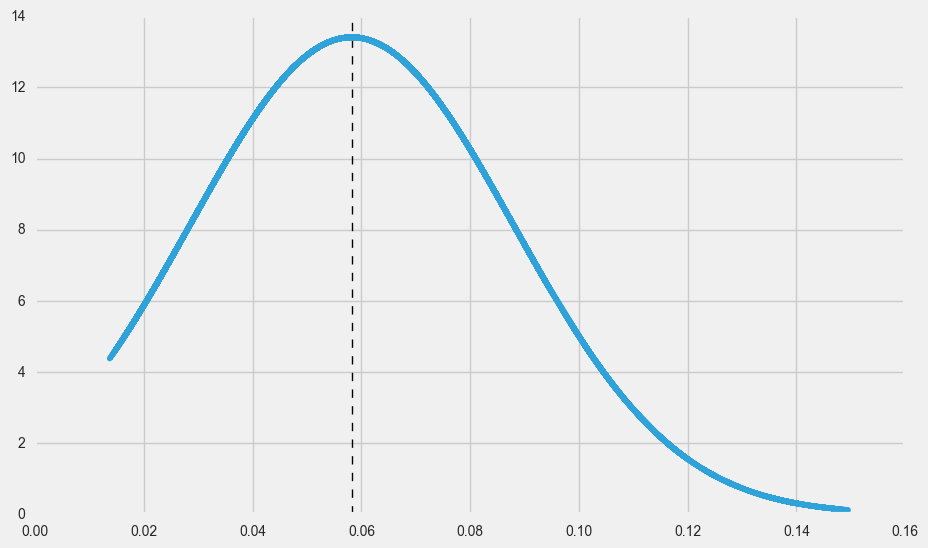

In [287]:
plt.rcParams["figure.figsize"] = (10,6)
plt.axvline(dgs10['DGS10'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.plot(dgs10['DGS10'],pdf10Yr)

In [173]:
dgs10['Return10Year']=dgs10['Matured Price'].shift(1)/dgs10['Matured Price']

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [174]:
dgs10.head()

,observation_date,DGS10,Matured Price,Return10Year
0,1/4/1982,0.1419,265.289017,NaN
1,1/5/1982,0.1444,259.550284,1.022110
2,1/6/1982,0.1459,256.172676,1.013185
3,1/7/1982,0.1463,255.280167,1.003496
4,1/8/1982,0.1448,258.644824,0.986991


In [175]:
 DGS10 =dgs10.dropna(axis=0)

In [176]:
l=[]

In [177]:
for items in DGS10['Return10Year']:
    v=math.log(items,2.71828)
    l.append(v)

In [178]:
DGS10['LogReturn10Year']=l

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [179]:
DGS10.head()

,observation_date,DGS10,Matured Price,Return10Year,LogReturn10Year
1,1/5/1982,0.1444,259.550284,1.022110,0.021869
2,1/6/1982,0.1459,256.172676,1.013185,0.013099
3,1/7/1982,0.1463,255.280167,1.003496,0.003490
4,1/8/1982,0.1448,258.644824,0.986991,-0.013094
5,1/11/1982,0.1481,251.305984,1.029203,0.028785


In [180]:
DGS10['LogReturn10Year'].describe()

count    9096.000000
mean       -0.000112
std         0.006209
min        -0.068322
25%        -0.003730
50%         0.000000
75%         0.002945
max         0.038475
Name: LogReturn10Year, dtype: float64

In [181]:
DGS10['LogReturn10Year'].kurtosis()

4.808697597298214

In [182]:
DGS10['LogReturn10Year'].skew()

-0.17234573793765151

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


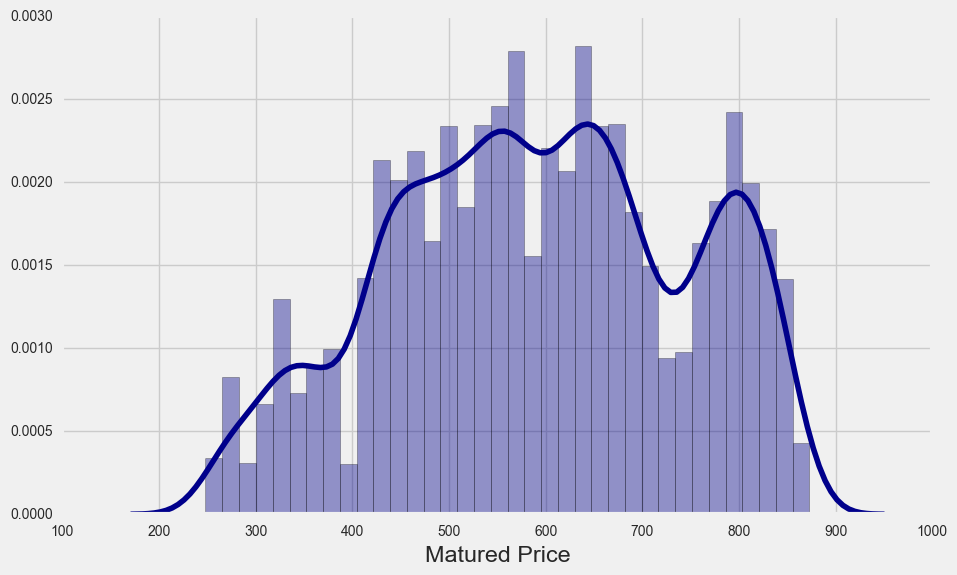

In [288]:

sns.distplot(DGS10['Matured Price'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

C:\Users\chint\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


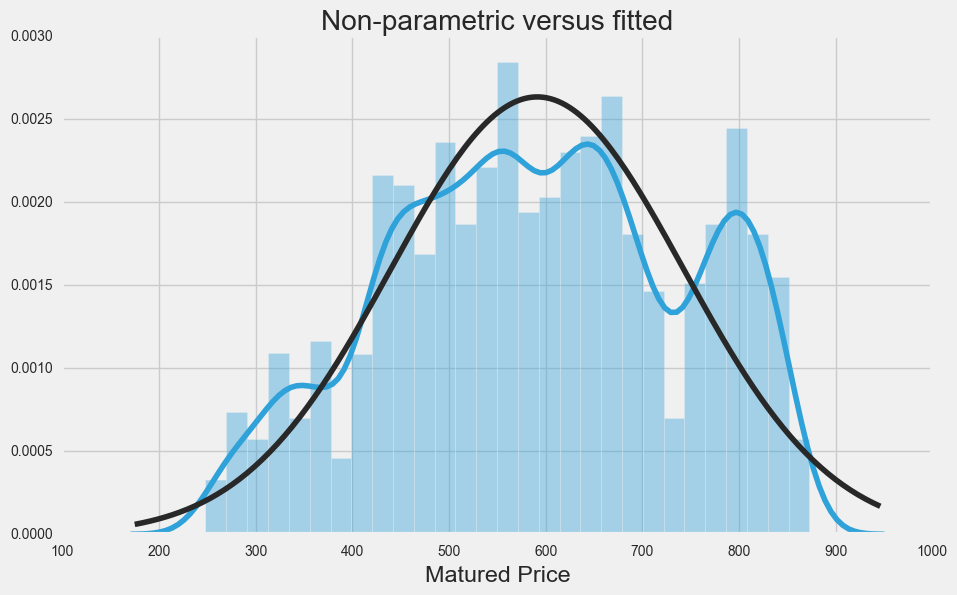

In [289]:
plt.title("Non-parametric versus fitted")
sns.distplot(DGS10['Matured Price'], kde=True, fit=stats.norm)

## KALMAN FILTER

### Deriving kalman filter algorithm inorder to increase the reliability of data for our predictions. This Kalman filter helps in calculating the noise in the data from the external space 

In [187]:
df = pd.read_csv('combined1.csv')

In [188]:
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [189]:
fixedData = df.dropna(axis=0)

In [190]:
fixedData.head()

,observation_date,DGS3MO,DGS2,DGS5,DGS10,DGS30
1,1/5/1982,12.20,14.09,14.41,14.44,14.14
2,1/6/1982,12.16,14.19,14.60,14.59,14.28
3,1/7/1982,12.17,14.33,14.66,14.63,14.32
4,1/8/1982,11.98,14.11,14.47,14.48,14.13
5,1/11/1982,12.49,14.55,14.83,14.81,14.43


In [191]:
fixedData['DGS3MO']=fixedData['DGS3MO']/100
fixedData['DGS2']=fixedData['DGS2']/100
fixedData['DGS5']=fixedData['DGS5']/100
fixedData['DGS10']=fixedData['DGS10']/100
fixedData['DGS30']=fixedData['DGS30']/100

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [192]:
fixedData['observation_date'] = pd.to_datetime(fixedData['observation_date'])
fixedData.index = fixedData['observation_date']
del fixedData['observation_date']

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [193]:
priceOne = []
pricetwo = []
priceThree = []
priceFour = []
priceFive = []
for index,row in fixedData.iterrows():
    matpriceThree = 1000/((1+row['DGS3MO'])**0.25)
    matpriceTwoyr = 1000/((1+row['DGS2'])**2)
    matpriceFiveyr = 1000/((1+row['DGS5'])**5)
    matpriceTenyr = 1000/((1+row['DGS10'])**10)
    matpriceThrityr = 1000/((1+row['DGS30'])**30)
    priceOne.append(matpriceThree)
    pricetwo.append(matpriceTwoyr)
    priceThree.append(matpriceFiveyr)
    priceFour.append(matpriceTenyr)
    priceFive.append(matpriceThrityr)

In [194]:
fixedData['3MonthPrice'] =priceOne
fixedData['2Price'] =pricetwo
fixedData['5Price'] =priceThree
fixedData['10Price'] =priceFour
fixedData['30Price'] =priceFive

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [195]:
fixedData.head(10)

,DGS3MO,DGS2,DGS5,DGS10,DGS30,3MonthPrice,2Price,5Price,10Price,30Price
observation_date,,,,,,,,,,
1982-01-05,0.1220,0.1409,0.1441,0.1444,0.1414,971.631947,768.254017,510.129069,259.550284,18.917509
1982-01-06,0.1216,0.1419,0.1460,0.1459,0.1428,971.718564,766.909035,505.914249,256.172676,18.234466
1982-01-07,0.1217,0.1433,0.1466,0.1463,0.1432,971.696906,765.031985,504.591944,255.280167,18.044029
1982-01-08,0.1198,0.1411,0.1447,0.1448,0.1413,972.108822,767.984738,508.793537,258.644824,18.967299
1982-01-11,0.1249,0.1455,0.1483,0.1481,0.1443,971.005122,762.096230,500.867873,251.305984,17.530854
1982-01-12,0.1252,0.1449,0.1470,0.1462,0.1427,970.940393,762.895212,503.712711,255.502974,18.282399
1982-01-13,0.1270,0.1478,0.1486,0.1483,0.1447,970.552474,759.045062,500.214112,250.868626,17.348004
1982-01-14,0.1317,0.1471,0.1469,0.1470,0.1431,969.543214,759.971735,503.932347,253.726496,18.091445
1982-01-15,0.1274,0.1481,0.1486,0.1482,0.1441,970.466375,758.648435,500.214112,251.087201,17.623024


In [196]:
# Main function
def KalmanFilterForecast(R, k):
    if k == 1:
        param0 = np.array([100, 0.25 * np.log(np.var(R)), -100, 0.25 * np.log(np.var(R))])
    elif k == 2:
        param0 = np.array([100, 100, np.log(np.var(R)), -100, -100, 0.25 * np.log(np.var(R)), 0.25 * np.log(np.var(R))])

    def objective(params):
        Likehood,_=KalmanFilter(R,k,params)
        return Likehood
    
    params_star=optimize.fmin(objective,param0)

    u_smooth = KalmanSmoother(R, k, params_star)
    
    Z = 2 / (1 + np.exp(-params_star[0])) - 1
    H = np.exp(params_star[1])
    T = 2 / (1 + np.exp(-params_star[2])) - 1
    Q = np.exp(params_star[3])
    
    
    u_tplus1 = T * u_smooth[:] + np.random.randn() * np.sqrt(Q)
    price_tplus1 = Z * u_tplus1 + np.random.randn() * np.sqrt(H)
    
    return price_tplus1, u_tplus1, u_smooth

In [197]:
def KalmanFilter(R, k, params):
    #R=fixedData['3MonthPrice']
    #R=np.array(np.matrix(R))
    #k = 1
    S_length = len(R)
    S = S_length + 1
    if k == 1:
        Z = 2 / (1 + np.exp(-params[0])) - 1
        H = np.exp(params[1])
        T = 2 / (1 + np.exp(-params[2])) - 1
        Q = np.exp(params[3])
    elif k == 2:
        Z = ([2 / (1 + np.exp(-params[0])) - 1, 2 / (1 + np.exp(-params[1])) - 1])
        Z = np.matrix(Z)
        H = np.exp(params[2])
        T = ([[2 / (1 + np.exp(-params[3])) - 1, 0],[0, 2 / (1 + np.exp(-params[4])) - 1]])
        Q = ([[np.exp(params[5]), 0],[0, np.exp(params[6])]])
        
    u_predict = np.zeros((k, S))
    u_update = np.zeros((k, S))
    P_predict = np.zeros((k, k, S))
    P_update = np.zeros((k, k, S))
    v = np.zeros((1, S))
    F = np.zeros((1, S))
    KF_Dens = np.zeros((1, S))
    
    for x in range(S):
            if x == 0:
                P_update[:,:,x] = 1000 * np.eye(k)
                P_predict[:,:, x]= T * P_update[:,:,0] * T + Q
            else:
                F[0][x] =Z * P_predict[:,:, x - 1] * np.transpose(Z) + H
                v[0][x] = R[x - 1]- Z * u_predict[:, x - 1]
                u_update[:, x] = u_predict[:, x - 1] + P_predict[:,:, x - 1] * np.transpose(Z) * 1/F[0][x] * v[0][x]
                u_predict[:, x] = T * u_update[:, x]
                P_update[:, :, x] = P_predict[:,:, x] - P_predict[:,:, x - 1] * np.transpose(Z) * 1/F[0][x] * Z * P_predict[:, :, x - 1]
                P_predict[:, :, x] = T * P_update[:, :, x] * np.transpose(T) + Q
                KF_Dens[0][x] = (1 / 2) * np.log(2 * np.pi) + (1 / 2) * np.log(np.abs(F[0][x])) + (1 / 2) * np.transpose(v[0][x]) * 1/(F[0][x] * v[0][x])

    Likelihood = sum(KF_Dens[0][1:S])

    varargout = [u_update, P_update, P_predict, T]
        
    return Likelihood, varargout


In [198]:
def KalmanSmoother(R, k, params_star):

    _, varargout = KalmanFilter(R, k, params_star)
    u_update, P_update, P_predict, T = varargout
    
    S = len(R) + 1
    u_smooth = np.zeros((k, S))
    P_smooth = np.zeros((k, k, S))
    u_smooth[:, S - 1] = u_update[:, S - 1]
    P_smooth[:, :, S - 1] = P_update[:, :, S - 1]
    
    for t in range(1, S - 1)[::-1]:
        u_smooth[:, t - 1] = u_update[:, t] + P_update[:, :, t] * (1/T) * np.linalg.inv(P_predict[:, :, t]) * (u_smooth[:, t] - T * u_update[:, t])
        P_smooth[:, :, t - 1] = P_update[:, :, t] + P_update[:, :, t] * (1/T) * np.linalg.pinv(P_predict[:, :, t]) * (P_smooth[:, :, t] - P_predict[:, :, t]) * np.linalg.pinv(P_predict[:, :, t]) * T * P_update[:, :, t]
    
    u_smooth = u_smooth.flatten()[1:]
    
    return u_smooth

In [199]:
R=fixedData['10Price']
#R=np.matrix(R)
k=1
#R=np.transpose(R)
#R = data.DGS10
Z = 1.2
T = 1.5
H = round(np.var(R),2)
Q = round(0.5*np.var(R),2)
p_update=1.2
#p_update=1.2
#R=np.transpose(R)
#R

In [200]:
KalmanFilterForecast(R, k)

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: overflow encountered in exp


Optimization terminated successfully.
         Current function value: 35428.556631
         Iterations: 63
         Function evaluations: 207


C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: RuntimeWarning: overflow encountered in exp


(array([  6.23639382e-07,   6.27710735e-07,   6.23639609e-07, ...,
          6.25675456e-07,   6.25675115e-07,  -7.36193758e+02]),
 array([  6.23639382e-07,   6.27710735e-07,   6.23639609e-07, ...,
          6.25675456e-07,   6.25675115e-07,  -7.36193758e+02]),
 array([  2.03573336e-09,  -2.03561967e-09,   2.03550599e-09, ...,
         -3.41060513e-13,   0.00000000e+00,   7.36193759e+02]))

In [ ]:
params=np.matrix([[Z],[H],[T],[Q]])

In [ ]:
params_star = [Z,H,1.2,Q]

In [ ]:
a,b,c=KalmanFilterForecast(fixedData['10Price'].values,1)
a,b,c

In [ ]:
_, varargout = KalmanFilter(R, k, params)
u_update, P_update, P_predict, T = varargout
P_predict = np.squeeze(np.asarray(P_predict))

In [ ]:
R= fixedData['10Price']
#R=np.matrix(R)
k=1
Z = 1.2
T = 1.5
H = round(np.var(R),2)
Q = round(0.5*np.var(R),2)
p_update=1.2
#p_update=1.2
#R=np.transpose(R)
#R

In [ ]:
# calculating kalman filter in two steps 1) The update and 2) The prediction evaluations
def kalmanFil(R, Z, T, H, Q, p_update):
    kalFil=[]
    u_update=0
    for y in R:
        u_pred=T*u_update # predicted values
        p_pred=T*p_update*T+Q  # predicted values
        F=Z*p_update*Z+H
        p_update=p_pred-(p_pred*Z*Z*p_pred)/(F) # Update evaluation
        u_update=u_pred+(p_pred*Z)*(y-(Z*u_pred))/F # Upate evaluation
        kalFil.append(u_update)
    return kalFil

In [ ]:
# Plotting the comparision graph
def kalmanplot(R, kalFilterList):
    plt.plot(fixedData.index,kalFilterList,color='orange', lw='1',label='Optimised Kalman Filter')
    plt.plot(fixedData.index,R,color='magenta',lw='1',label='Actual Value')  
    plt.legend(loc=1)
    plt.title("KalmanFilter Vs Actual value Graph", fontweight="bold", fontsize = 20)
    plt.xlabel("Observation Date", fontweight="bold", fontsize = 18)
    plt.ylabel("Maturity rate", fontweight="bold", fontsize = 18)
    plt.rcParams['figure.figsize'] = (15, 8)
    plt.show()

In [ ]:
finalList = []
finalList = kalmanFil(R, Z, T, H, Q, p_update)
kalmanplot(R, finalList)

#### Inference from the graph:
    As the weight values are increased the kalman filter prediction values are getting closer to the actual values 

## Bolinger Band 

In [201]:
# Creating a Bollinger band to identify when to short(sell) or long(hold/buy) the position of a 10 year maturity fixed income asset.

In [202]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from numpy import dot
from numpy.linalg import inv
from sklearn.decomposition import PCA as sklearnPCA

In [203]:
df = pd.read_csv('combined1.csv')

In [204]:
my_year_month_fmt = mdates.DateFormatter('%m/%y')

In [205]:
df.head()

,observation_date,DGS3MO,DGS2,DGS5,DGS10,DGS30
0,1/4/1982,11.87,13.87,14.15,14.19,NaN
1,1/5/1982,12.20,14.09,14.41,14.44,14.14
2,1/6/1982,12.16,14.19,14.60,14.59,14.28
3,1/7/1982,12.17,14.33,14.66,14.63,14.32
4,1/8/1982,11.98,14.11,14.47,14.48,14.13


In [206]:
fixedData = df.dropna(axis=0)

In [207]:
fixedData['DGS3MO']=fixedData['DGS3MO']/100
fixedData['DGS2']=fixedData['DGS2']/100
fixedData['DGS5']=fixedData['DGS5']/100
fixedData['DGS10']=fixedData['DGS10']/100
fixedData['DGS30']=fixedData['DGS30']/100

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [208]:
fixedData.head()

,observation_date,DGS3MO,DGS2,DGS5,DGS10,DGS30
1,1/5/1982,0.1220,0.1409,0.1441,0.1444,0.1414
2,1/6/1982,0.1216,0.1419,0.1460,0.1459,0.1428
3,1/7/1982,0.1217,0.1433,0.1466,0.1463,0.1432
4,1/8/1982,0.1198,0.1411,0.1447,0.1448,0.1413
5,1/11/1982,0.1249,0.1455,0.1483,0.1481,0.1443


In [209]:
fixedData['observation_date'] = pd.to_datetime(fixedData['observation_date'])
fixedData.index = fixedData['observation_date']
del fixedData['observation_date']

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [210]:
def priceCalculationForAllBonds(fixedData):
    priceOne = []
    pricetwo = []
    priceThree = []
    priceFour = []
    priceFive = []
    for index,row in fixedData.iterrows():
        matpriceThree = 1000/((1+row['DGS3MO'])**0.25)
        matpriceTwoyr = 1000/((1+row['DGS2'])**2)
        matpriceFiveyr = 1000/((1+row['DGS5'])**5)
        matpriceTenyr = 1000/((1+row['DGS10'])**10)
        matpriceThrityr = 1000/((1+row['DGS30'])**30)
        priceOne.append(matpriceThree)
        pricetwo.append(matpriceTwoyr)
        priceThree.append(matpriceFiveyr)
        priceFour.append(matpriceTenyr)
        priceFive.append(matpriceThrityr)
    fixedData['3MonthPrice'] =priceOne
    fixedData['2Price'] =pricetwo
    fixedData['5Price'] =priceThree
    fixedData['10Price'] =priceFour
    fixedData['30Price'] =priceFive
    price = pd.DataFrame()
    price['3MonthPrice']=fixedData['3MonthPrice']
    price['2Price']=fixedData['2Price']
    price['5Price']=fixedData['5Price']
    price['30Price']=fixedData['30Price']
    price['10Price']=fixedData['10Price']
    return price

In [211]:
price = priceCalculationForAllBonds(fixedData)
price.head()

C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,3MonthPrice,2Price,5Price,30Price,10Price
observation_date,,,,,
1982-01-05,971.631947,768.254017,510.129069,18.917509,259.550284
1982-01-06,971.718564,766.909035,505.914249,18.234466,256.172676
1982-01-07,971.696906,765.031985,504.591944,18.044029,255.280167
1982-01-08,972.108822,767.984738,508.793537,18.967299,258.644824
1982-01-11,971.005122,762.096230,500.867873,17.530854,251.305984


In [212]:
def standardisedPriceCalculation(price):
    mean3mo = price['3MonthPrice'].mean()
    mean3std= price['3MonthPrice'].std()
    std3mo = (price['3MonthPrice'] - mean3mo)/mean3std
    mean2 = price['2Price'].mean()
    mean2std = price['2Price'].std()
    std2 = (price['2Price'] - mean2)/mean2std
    mean5 = price['5Price'].mean()
    mean5std = price['5Price'].std()
    std5 = (price['5Price'] - mean5)/mean5std
    mean10 = price['10Price'].mean()
    mean10std = price['10Price'].std()
    std10 = (price['10Price'] - mean10)/mean10std
    mean30 = price['30Price'].mean()
    mean30std = price['30Price'].std()
    std30 = (price['30Price'] - mean30)/mean30std
    combs = pd.DataFrame(index=price.index)
    combs['3MonthPrice']=std3mo
    combs['2Price']=std2
    combs['5Price']=std5
    combs['10Price']=std10
    combs['30Price']=std30
    return combs

In [213]:
combs = standardisedPriceCalculation(price)
combs.head()

,3MonthPrice,2Price,5Price,10Price,30Price
observation_date,,,,,
1982-01-05,-2.376784,-2.383003,-2.243543,-2.044276,-1.390705
1982-01-06,-2.365468,-2.405513,-2.279232,-2.065620,-1.395866
1982-01-07,-2.368298,-2.436928,-2.290429,-2.071260,-1.397305
1982-01-08,-2.314487,-2.387510,-2.254852,-2.049997,-1.390329
1982-01-11,-2.458669,-2.486062,-2.321962,-2.096374,-1.401182


In [214]:
# Principal Component Analysis

In [215]:
## Performing Principal Component Analysis for dimensionality reduction for using more co-variant data to regress 10 Year Bond Price.

In [216]:
X = combs.ix[:,0:5].values
y = combs.ix[:,4].values
sklearn_pca = sklearnPCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[ 4.67576667,  0.7530927 ,  0.20612015],
       [ 4.7090034 ,  0.74740689,  0.23989325],
       [ 4.7326756 ,  0.75791672,  0.2508173 ],
       ..., 
       [-2.01880143,  0.58460589,  0.22632897],
       [-2.00980461,  0.5777426 ,  0.22741407],
       [-1.99234976,  0.55023419,  0.21422727]])

In [217]:
# OLS Regression

In [218]:
def pcaEstimation(Y_sklearn,combs):
    pca1=[]
    pca2=[]
    pca3=[]
    for a in Y_sklearn:
        pca1.append(a[0])
    for a in Y_sklearn:
        pca2.append(a[1])
    for a in Y_sklearn:
        pca3.append(a[2])
        #print(a[2])
    combs['PCA1']=pca1
    combs['PCA2']=pca2
    combs['PCA3']=pca3
    combs['PCA1Returns']= combs['PCA1'].shift(1)
    combs['PCA2Returns']=combs['PCA2'].shift(1)
    combs['PCA3Returns']=combs['PCA3'].shift(1)
    combs.fillna(0,inplace=True)
    X = combs.ix[:,8:11].values
    y = combs.ix[:,3].values
    y = y.reshape(len(X),1)
    beta_hat = dot(dot((inv(dot(X.T, X))), X.T), y) #OLS estimator beta: N x 1
    y_hat = np.dot(X,beta_hat) #Predictive value of Y_t using OLS
    combs['Regressed10Price']=y_hat
    residuals = y - y_hat #Residuals from OLS: Y - X*beta
    r_squared = 1 - ((np.var(residuals)/np.var(y)))
    np.std(residuals)
    r_square = 1 - (np.var(residuals)/np.var(y)) #This score tells us the regression sum of squares divided by the total sum of squares
    return combs,r_squared,residuals

In [219]:
combs,r_squared,residuals = pcaEstimation(Y_sklearn,combs)
residuals

array([[-2.04427551],
       [-0.05385802],
       [-0.03006912],
       ..., 
       [-0.02249857],
       [ 0.01094579],
       [ 0.00805006]])

In [220]:
r_squared

0.99801640726327157

# Performed Regression and proceeding with plotting Bollinger bands

## 20 Day MA

In [221]:
def tweentyDayBolinger(combs):
    short_rolling = combs.rolling(window=5).mean()
    # Calculating the long-window simple moving average
    long_rolling = combs.rolling(window=20).mean()
    # Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
    combs['20 Day MA'] = combs['Regressed10Price'].rolling(window=20).mean()
    combs['20 Day STD'] = combs['Regressed10Price'].rolling(window=20).std()
    combs['Upper Band'] = combs['20 Day MA'] + (combs['20 Day STD'] * 2)
    combs['Lower Band'] = combs['20 Day MA'] - (combs['20 Day STD'] * 2)
    start_date = '1982-05-01'
    end_date = '2018-05-17'
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(combs.loc[start_date:end_date, :].index, combs.loc[start_date:end_date, 'Regressed10Price'], label='Price')
    ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'Regressed10Price'], label = '20-days SMA')
    ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'Regressed10Price'], label = '5-days SMA')

    ax.legend(loc='best')
    ax.set_ylabel('Price in $')


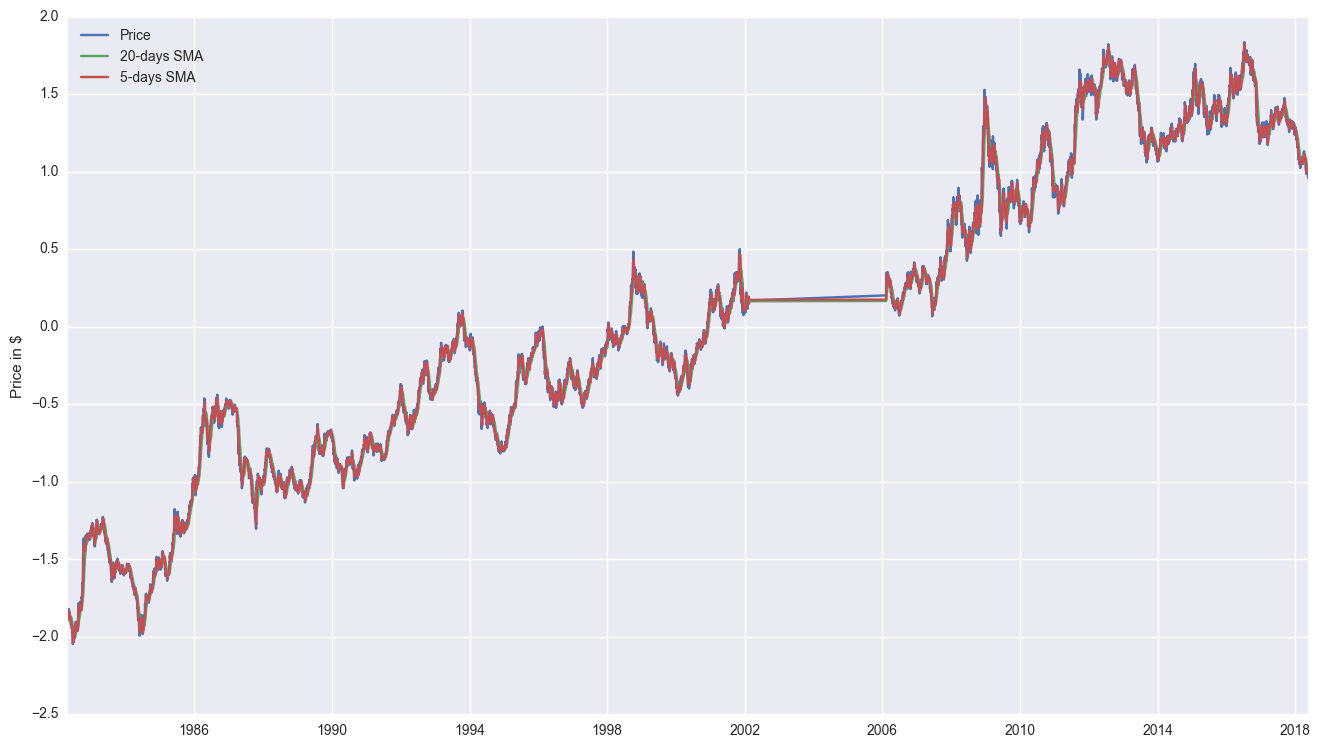

In [222]:
tweentyDayBolinger(combs)

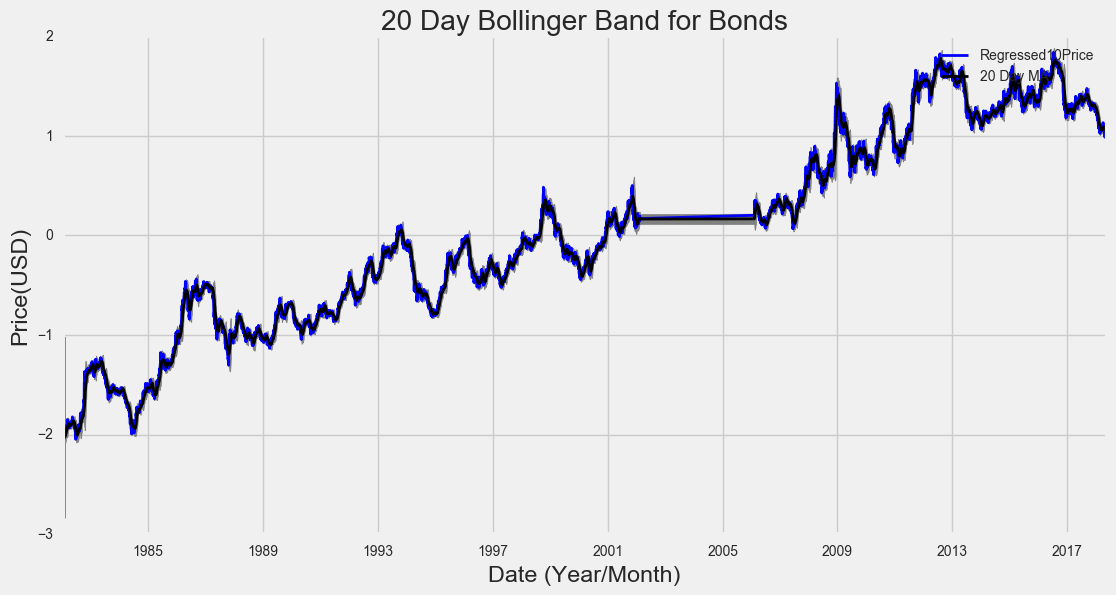

In [223]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis = combs.index.get_level_values(0)
ax.fill_between(x_axis, combs['Upper Band'], combs['Lower Band'], color='grey')
ax.plot(x_axis, combs['Regressed10Price'], color='blue', lw=2)
ax.plot(x_axis, combs['20 Day MA'], color='black', lw=2)
ax.set_title('20 Day Bollinger Band for Bonds')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

## 150 Day MA

In [224]:
def oneFiftyDayaBollinger(combs):
    short_rolling1 = combs.rolling(window=5).mean()
    # Calculating the long-window simple moving average
    long_rolling1 = combs.rolling(window=150).mean()
    combs['150 Day MA'] = combs['Regressed10Price'].rolling(window=150).mean()
    combs['150 Day STD'] = combs['Regressed10Price'].rolling(window=150).std()
    combs['Upper Band'] = combs['150 Day MA'] + (combs['150 Day STD'] * 2)
    combs['Lower Band'] = combs['150 Day MA'] - (combs['150 Day STD'] * 2)
    start_date = '1982-05-01'
    end_date = '2018-05-17'
    fig, ax = plt.subplots(figsize=(16,9))

    ax.plot(combs.loc[start_date:end_date, :].index, combs.loc[start_date:end_date, 'Regressed10Price'], label='Price')
    ax.plot(long_rolling1.loc[start_date:end_date, :].index, long_rolling1.loc[start_date:end_date, 'Regressed10Price'], label = '150-days SMA')
    ax.plot(short_rolling1.loc[start_date:end_date, :].index, short_rolling1.loc[start_date:end_date, 'Regressed10Price'], label = '5-days SMA')

    ax.legend(loc='best')
    ax.set_ylabel('Price in $')

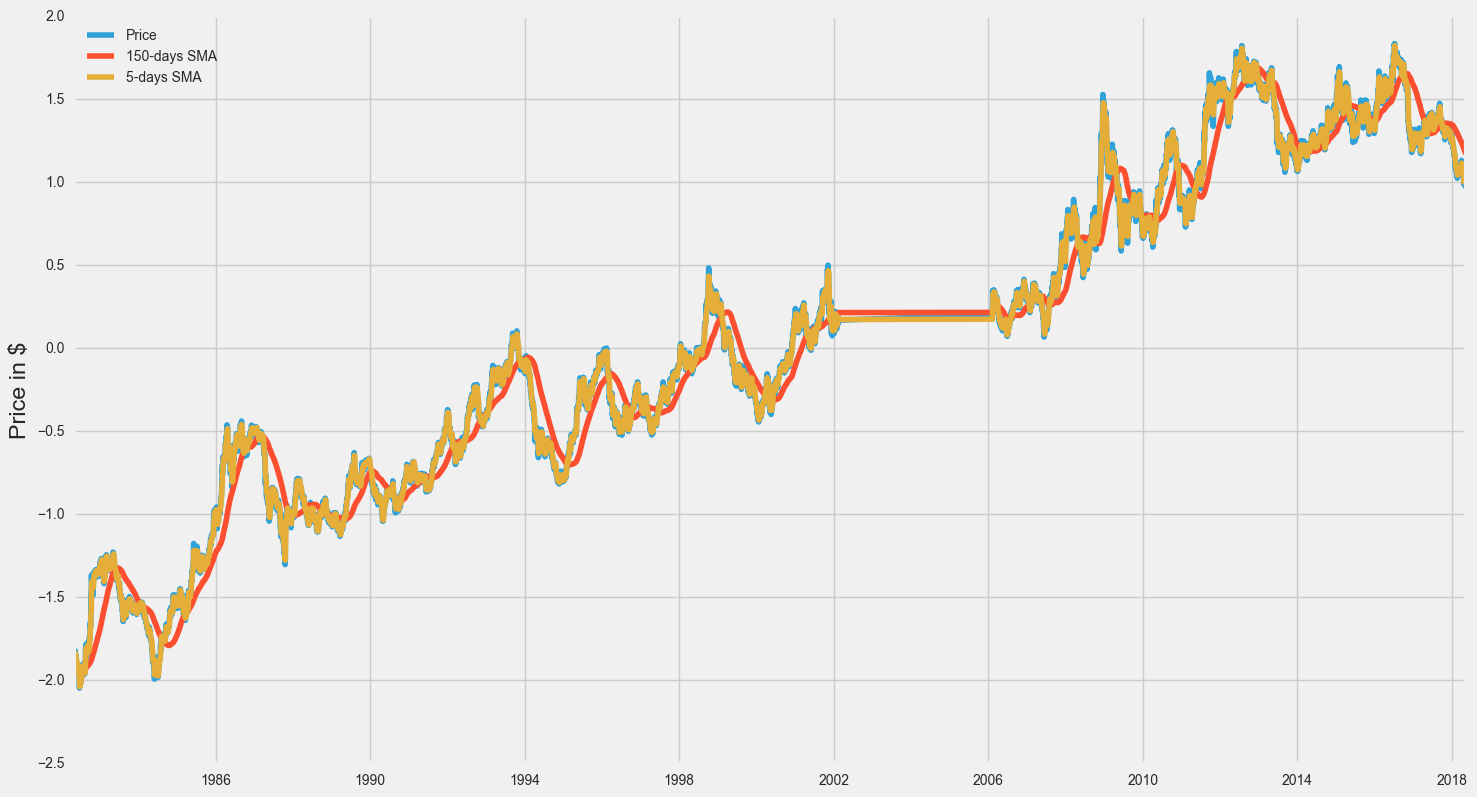

In [225]:
oneFiftyDayaBollinger(combs)

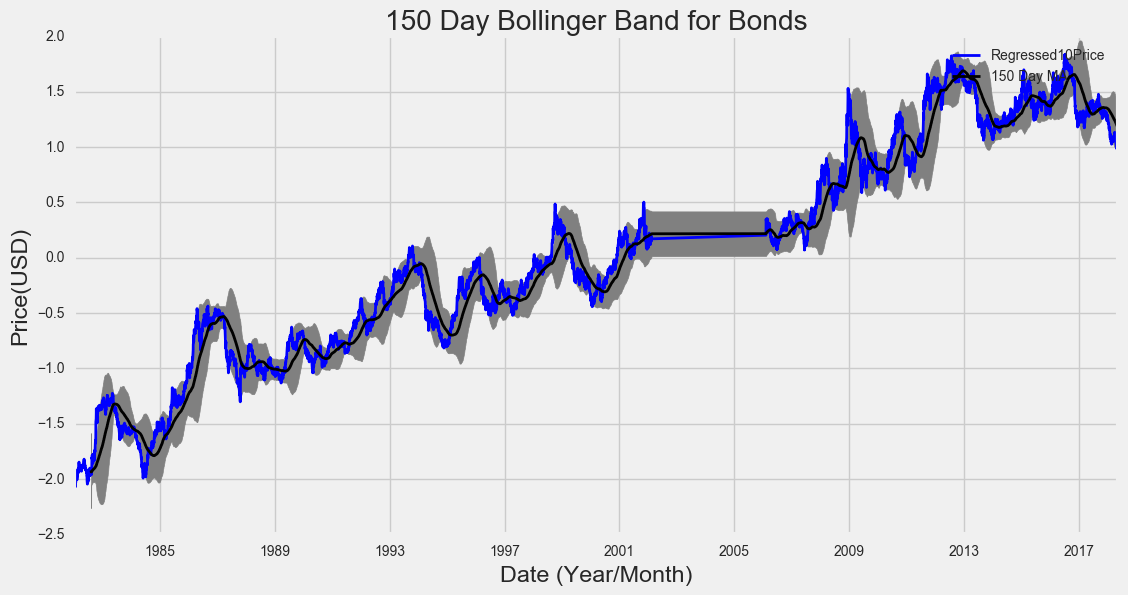

In [226]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)
x_axis = combs.index.get_level_values(0)
ax.fill_between(x_axis, combs['Upper Band'], combs['Lower Band'], color='grey')
ax.plot(x_axis, combs['Regressed10Price'], color='blue', lw=2)
ax.plot(x_axis, combs['150 Day MA'], color='black', lw=2)
ax.set_title('150 Day Bollinger Band for Bonds')
ax.set_xlabel('Date (Year/Month)')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

#### The grey area shows the full squeeze effect of upper and lower bands. The regressed 10 year bond prices and its 150 trading days moving average can be seen and read better.

# Signals

In [227]:
def signals(combs):
    # Initialize the short and long windows
    short_window = 20
    long_window = 150

    # Initialize the `signals` DataFrame with the `signal` column
    signals = pd.DataFrame(index=combs.index)
    signals['signal'] = 0.0

    # Create short simple moving average over the short window
    signals['short_mavg'] = combs['Regressed10Price'].rolling(window=short_window, min_periods=1, center=False).mean()

    # Create long simple moving average over the long window
    signals['long_mavg'] = combs['Regressed10Price'].rolling(window=long_window, min_periods=1, center=False).mean()

    # Create signals
    signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                                > signals['long_mavg'][short_window:], 1.0, 0.0)   

    # Generate trading orders
    signals['positions'] = signals['signal'].diff()

    return signals

In [228]:
signals = signals(combs)
print(signals.head())

                  signal  short_mavg  long_mavg  positions
observation_date                                          
1982-01-05           0.0    0.000000   0.000000        NaN
1982-01-06           0.0   -1.005881  -1.005881        0.0
1982-01-07           0.0   -1.350984  -1.350984        0.0
1982-01-08           0.0   -1.526633  -1.526633        0.0
1982-01-11           0.0   -1.627209  -1.627209        0.0


In [229]:
def signalPlot():
    fig = plt.figure()

    # Add a subplot and label for y-axis
    ax1 = fig.add_subplot(111,  ylabel='Price in $')

    # Plot the closing price
    combs['Regressed10Price'].plot(ax=ax1, color='r', lw=2.)

    # Plot the short and long moving averages
    signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

    # Plot the buy signals
    ax1.plot(signals.loc[signals.positions == 1.0].index, 
             signals.short_mavg[signals.positions == 1.0],
             '^', markersize=10, color='m')

    # Plot the sell signals
    ax1.plot(signals.loc[signals.positions == -1.0].index, 
             signals.short_mavg[signals.positions == -1.0],
             'v', markersize=10, color='k')

    # Show the plot
    plt.show()

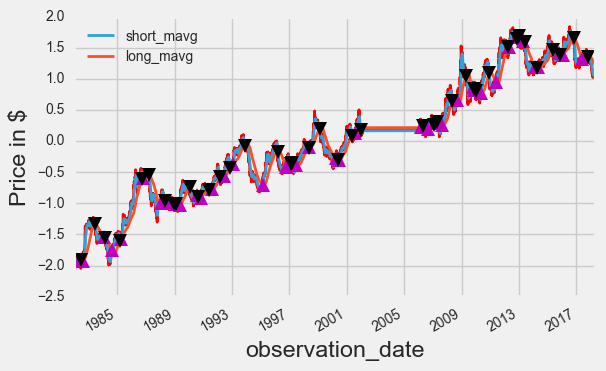

In [230]:
signalPlot()

# Backtesting

## This technique is performed by testing the built model on a particular time frame to check whether the actual results are being replicated or not to get an estimate the accuracy of model

In [231]:
def portfolioReturnsCalculation(combs):
    initial_capital= float(1000.0)

    # Create a DataFrame `positions`
    positions = pd.DataFrame(index=signals.index).fillna(0.0)

    # Buy a 100 shares
    positions['10 Year Tresury Bonds'] = 100*signals['signal']   

    # Initialize the portfolio with value owned   
    portfolio = positions.multiply(combs['Regressed10Price'], axis=0)

    # Store the difference in shares owned 
    pos_diff = positions.diff()

    # Add `holdings` to portfolio
    portfolio['holdings'] = (positions.multiply(combs['Regressed10Price'], axis=0)).sum(axis=1)

    # Add `cash` to portfolio
    portfolio['cash'] = initial_capital - (pos_diff.multiply(combs['Regressed10Price'], axis=0)).sum(axis=1).cumsum()   

    # Add `total` to portfolio
    portfolio['total'] = portfolio['cash'] + portfolio['holdings']

    # Add `returns` to portfolio
    portfolio['returns'] = portfolio['total'].pct_change()

    return portfolio


In [232]:
portfolio = portfolioReturnsCalculation(combs)
portfolio.head()

,10 Year Tresury Bonds,holdings,cash,total,returns
observation_date,,,,,
1982-01-05,0.0,0.0,1000.0,1000.0,NaN
1982-01-06,-0.0,0.0,1000.0,1000.0,0.0
1982-01-07,-0.0,0.0,1000.0,1000.0,0.0
1982-01-08,-0.0,0.0,1000.0,1000.0,0.0
1982-01-11,-0.0,0.0,1000.0,1000.0,0.0


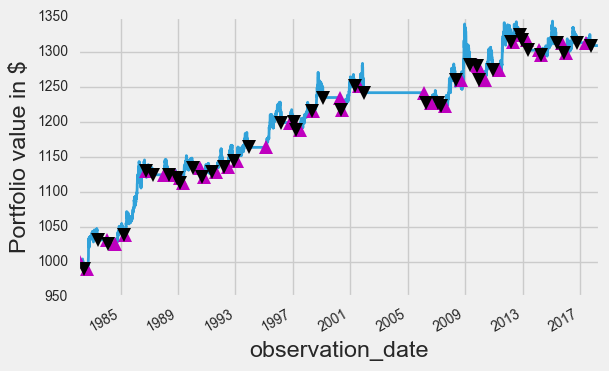

In [233]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

C:\Users\chint\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\chint\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: RuntimeWarning: invalid value encountered in log


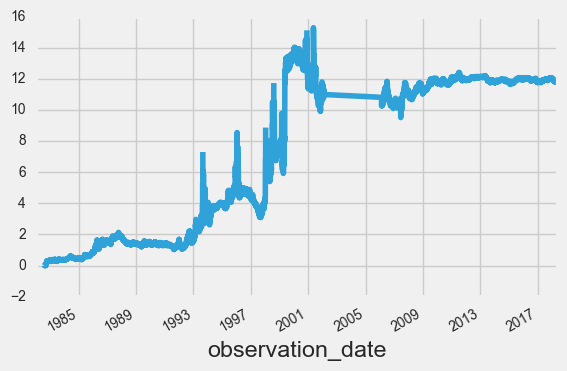

In [234]:
combs['Position'] = None
 
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(combs)):
    
    if (combs['Regressed10Price'].iloc[row] > combs['Upper Band'].iloc[row]) and (combs['Regressed10Price'].iloc[row-1] < combs['Upper Band'].iloc[row-1]):
        combs['Position'].iloc[row] = -1
        
    if (combs['Regressed10Price'].iloc[row] < combs['Lower Band'].iloc[row]) and (combs['Regressed10Price'].iloc[row-1] > combs['Lower Band'].iloc[row-1]):
        combs['Position'].iloc[row] = 1  

combs['Position'].fillna(method='ffill',inplace=True)
 
#Calculate the daily market return and multiply that by the position to determine strategy returns
combs['Market Return'] = np.log(combs['Regressed10Price'] / combs['Regressed10Price'].shift(1))
combs['Strategy Return'] = combs['Market Return'] * combs['Position']
 
#Plot the strategy returns
combs['Strategy Return'].cumsum().plot()

# Weights Change

In [235]:
combine=pd.DataFrame()
combine['Regtwo']=combs['2Price']
combine['Regfive']=combs['5Price']
combine['Regten']=combs['10Price']
combine.head()

,Regtwo,Regfive,Regten
observation_date,,,
1982-01-05,-2.383003,-2.243543,-2.044276
1982-01-06,-2.405513,-2.279232,-2.065620
1982-01-07,-2.436928,-2.290429,-2.071260
1982-01-08,-2.387510,-2.254852,-2.049997
1982-01-11,-2.486062,-2.321962,-2.096374


In [236]:
start_date = '2008-01-01'
end_date = '2018-05-17'
period = pd.DataFrame()
period['slicedtwo']= combine.loc[start_date:end_date, 'Regtwo']
period['slicedfive']= combine.loc[start_date:end_date, 'Regfive']
period['slicedten']= combine.loc[start_date:end_date, 'Regten']
period.head()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2008-01-02,0.571675,0.642598,0.621787
2008-01-03,0.587056,0.649579,0.621787
2008-01-04,0.614798,0.677584,0.634239
2008-01-07,0.608627,0.684605,0.642563
2008-01-08,0.608627,0.684605,0.642563


In [237]:
short_rolling = period.rolling(window=30).mean()
short_rolling.head()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2008-01-02,NaN,NaN,NaN
2008-01-03,NaN,NaN,NaN
2008-01-04,NaN,NaN,NaN
2008-01-07,NaN,NaN,NaN
2008-01-08,NaN,NaN,NaN


In [238]:
long_rolling = period.rolling(window=150).mean()
long_rolling.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,0.835425,0.960529,1.189149
2018-05-14,0.833197,0.958300,1.187101
2018-05-15,0.831014,0.955980,1.184875
2018-05-16,0.828767,0.953562,1.182553
2018-05-17,0.826540,0.951145,1.180172


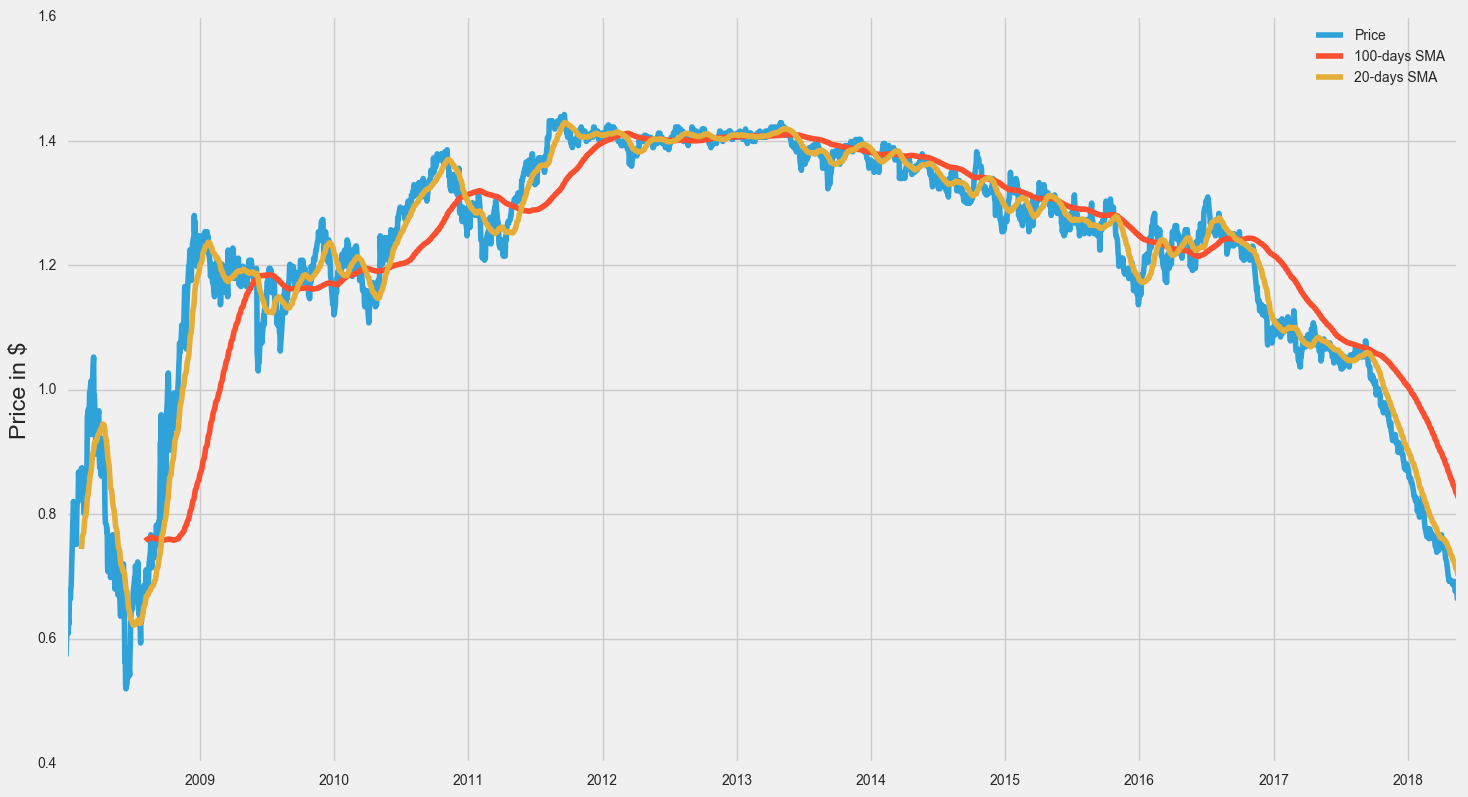

In [239]:
fig, ax = plt.subplots(figsize=(16,9))

ax.plot(period.loc[start_date:end_date, :].index, period.loc[start_date:end_date, 'slicedtwo'], label='Price')
ax.plot(long_rolling.loc[start_date:end_date, :].index, long_rolling.loc[start_date:end_date, 'slicedtwo'], label = '100-days SMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'slicedtwo'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

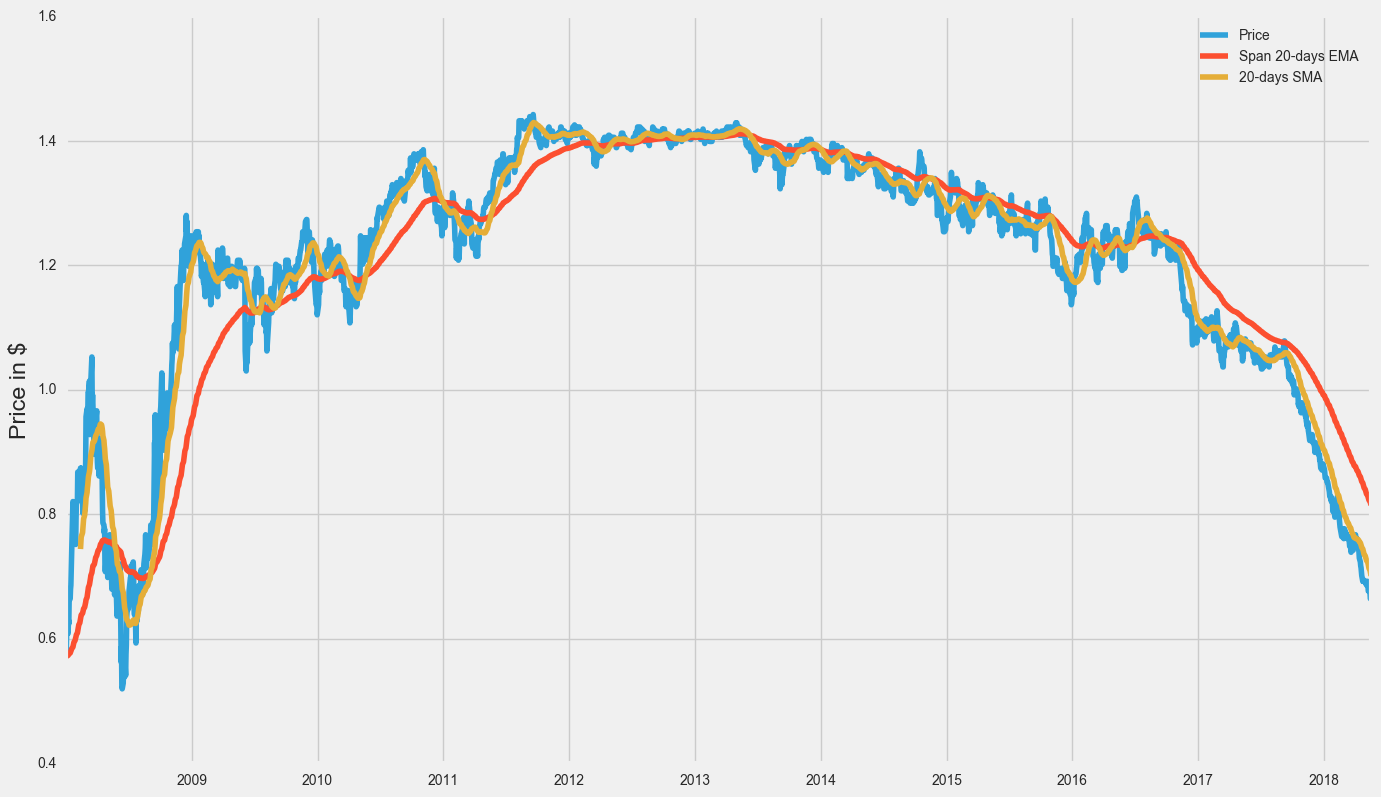

In [240]:
ema_short = period.ewm(span=150, adjust=False).mean()

fig, ax = plt.subplots(figsize=(15,9))

ax.plot(period.loc[start_date:end_date, :].index, period.loc[start_date:end_date, 'slicedtwo'], label='Price')
ax.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'slicedtwo'], label = 'Span 20-days EMA')
ax.plot(short_rolling.loc[start_date:end_date, :].index, short_rolling.loc[start_date:end_date, 'slicedtwo'], label = '20-days SMA')

ax.legend(loc='best')
ax.set_ylabel('Price in $')

In [241]:
trading_positions_raw = period - ema_short
trading_positions_raw.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,-0.145981,-0.145319,-0.134457
2018-05-14,-0.147111,-0.146924,-0.146212
2018-05-15,-0.154346,-0.169634,-0.180160
2018-05-16,-0.152302,-0.174413,-0.182238
2018-05-17,-0.147224,-0.172103,-0.188738


In [242]:
trading_positions = trading_positions_raw.apply(np.sign) * 1/3
trading_positions.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,-0.333333,-0.333333,-0.333333
2018-05-14,-0.333333,-0.333333,-0.333333
2018-05-15,-0.333333,-0.333333,-0.333333
2018-05-16,-0.333333,-0.333333,-0.333333
2018-05-17,-0.333333,-0.333333,-0.333333


In [243]:
trading_positions_final = trading_positions.shift(1)
trading_positions_final.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,-0.333333,-0.333333,-0.333333
2018-05-14,-0.333333,-0.333333,-0.333333
2018-05-15,-0.333333,-0.333333,-0.333333
2018-05-16,-0.333333,-0.333333,-0.333333
2018-05-17,-0.333333,-0.333333,-0.333333


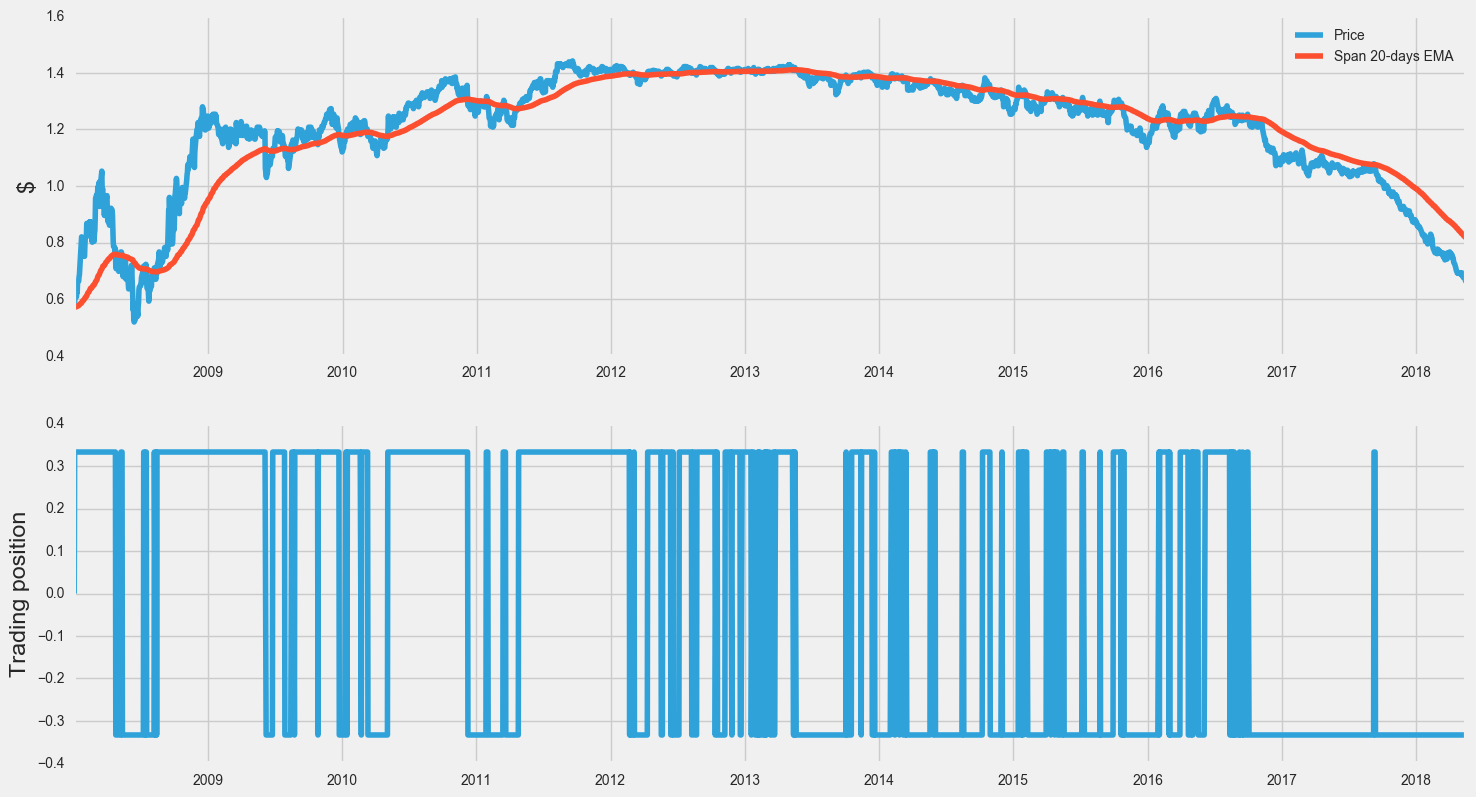

In [244]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

ax1.plot(period.loc[start_date:end_date, :].index, period.loc[start_date:end_date, 'slicedtwo'], label='Price')
ax1.plot(ema_short.loc[start_date:end_date, :].index, ema_short.loc[start_date:end_date, 'slicedtwo'], label = 'Span 20-days EMA')

ax1.set_ylabel('$')
ax1.legend(loc='best')
#ax1.xaxis.set_major_formatter(my_year_month_fmt)

ax2.plot(trading_positions_final.loc[start_date:end_date, :].index, trading_positions_final.loc[start_date:end_date, 'slicedtwo'], 
        label='Trading position')

ax2.set_ylabel('Trading position')

In [245]:
asset_log_returns = period
asset_log_returns.head()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2008-01-02,0.571675,0.642598,0.621787
2008-01-03,0.587056,0.649579,0.621787
2008-01-04,0.614798,0.677584,0.634239
2008-01-07,0.608627,0.684605,0.642563
2008-01-08,0.608627,0.684605,0.642563


In [246]:
strategy_asset_log_returns = trading_positions_final * asset_log_returns
strategy_asset_log_returns.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,-0.225570,-0.266023,-0.343816
2018-05-14,-0.224535,-0.264831,-0.339243
2018-05-15,-0.221433,-0.256502,-0.327121
2018-05-16,-0.221433,-0.254128,-0.325613
2018-05-17,-0.222467,-0.254128,-0.322602


In [247]:
cum_strategy_asset_log_returns = strategy_asset_log_returns.cumsum()

# Transform the cumulative log returns to relative returns
cum_strategy_asset_relative_returns = cum_strategy_asset_log_returns


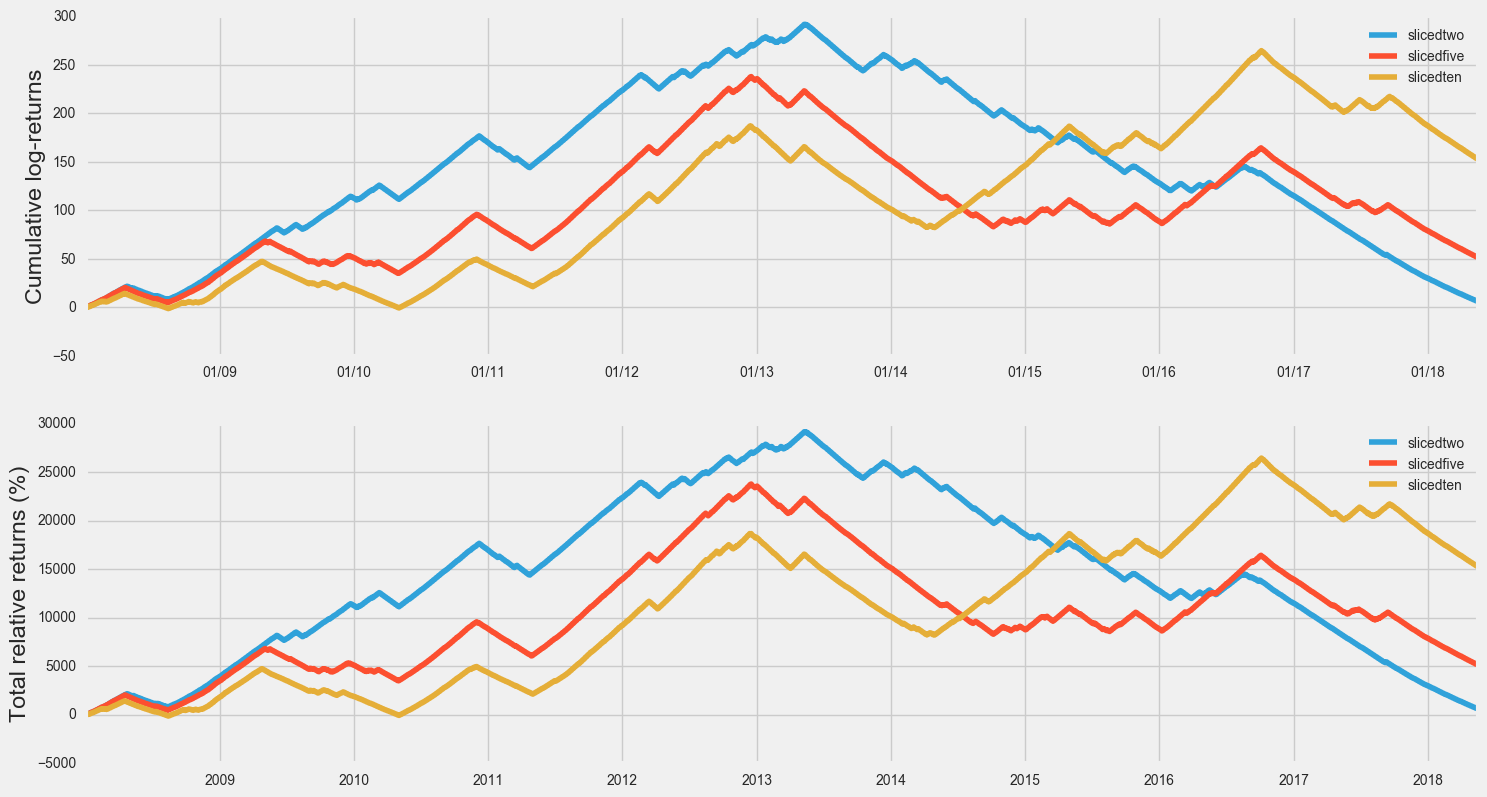

In [248]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,9))

for c in asset_log_returns:
    ax1.plot(cum_strategy_asset_log_returns.index, cum_strategy_asset_log_returns[c], label=str(c))

ax1.set_ylabel('Cumulative log-returns')
ax1.legend(loc='best')
ax1.xaxis.set_major_formatter(my_year_month_fmt)

for c in asset_log_returns:
    ax2.plot(cum_strategy_asset_relative_returns.index, 100*cum_strategy_asset_relative_returns[c], label=str(c))

ax2.set_ylabel('Total relative returns (%)')
ax2.legend(loc='best')

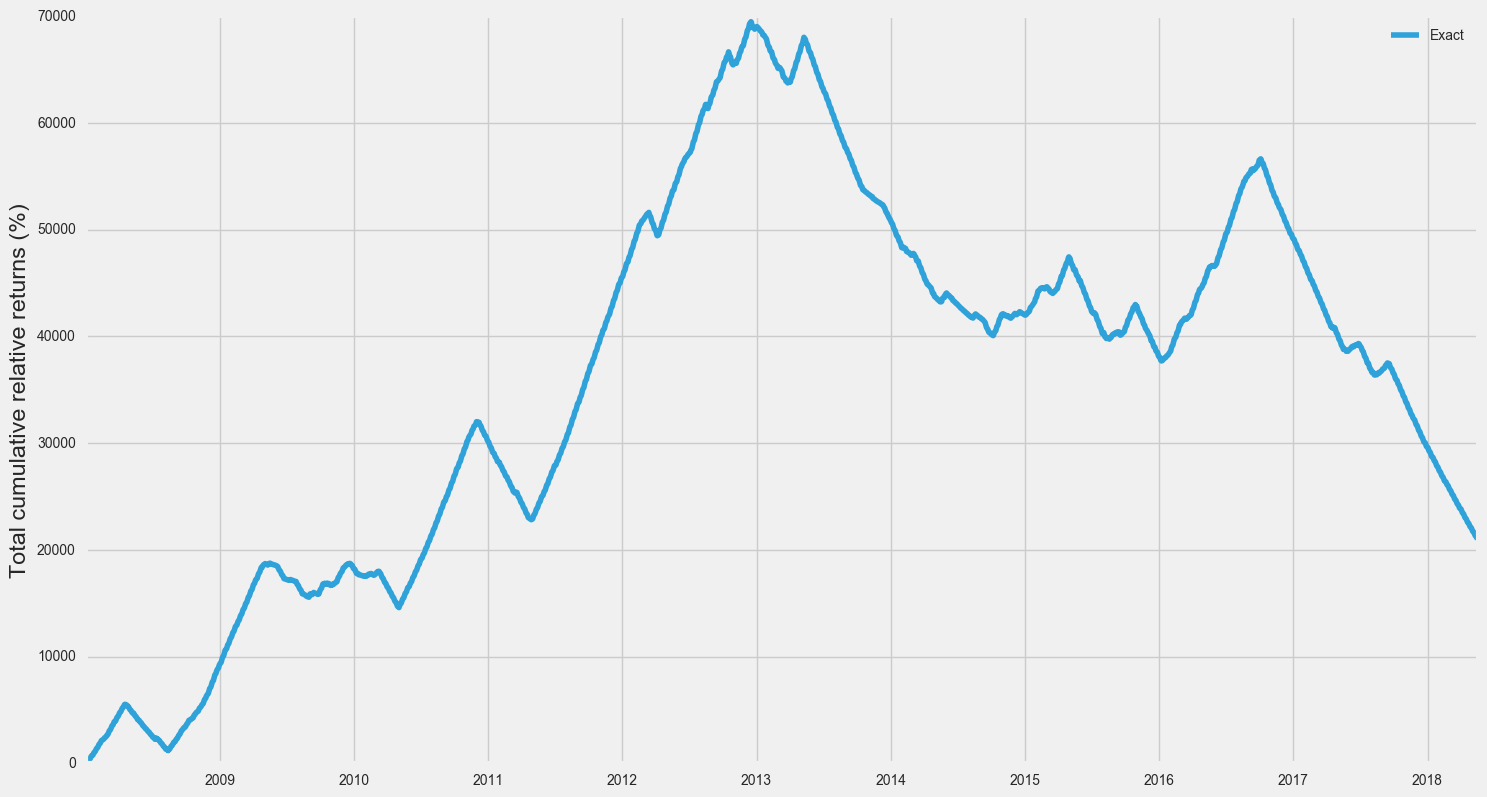

In [249]:
cum_relative_return_exact = cum_strategy_asset_relative_returns.sum(axis=1)

# Get the cumulative log-returns per asset
cum_strategy_log_return = cum_strategy_asset_log_returns.sum(axis=1)

# Transform the cumulative log returns to relative returns. This is the approximation
cum_relative_return_approx = cum_strategy_log_return

fig, ax = plt.subplots(figsize=(16,9))

ax.plot(cum_relative_return_exact.index, 100*cum_relative_return_exact, label='Exact')
#ax.plot(cum_relative_return_approx.index, 100*cum_relative_return_approx, label='Approximation')

ax.set_ylabel('Total cumulative relative returns (%)')
ax.legend(loc='best')



In [250]:
def print_portfolio_yearly_statistics(portfolio_cumulative_relative_returns, days_per_year = 52 * 5):

    total_days_in_simulation = portfolio_cumulative_relative_returns.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = portfolio_cumulative_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1/number_of_years) - 1

    print('Total portfolio return is: ' + '{:5.2f}'.format(total_portfolio_return) + '%')
    print('Average yearly return is: ' + '{:5.2f}'.format(100 * average_yearly_return) + '%')
    
print_portfolio_yearly_statistics(cum_relative_return_exact)

Total portfolio return is: 209.88%
Average yearly return is: 70.84%


## Buy and Sell

In [251]:
log_returns = period
log_returns.head()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2008-01-02,0.571675,0.642598,0.621787
2008-01-03,0.587056,0.649579,0.621787
2008-01-04,0.614798,0.677584,0.634239
2008-01-07,0.608627,0.684605,0.642563
2008-01-08,0.608627,0.684605,0.642563


In [252]:
r_t = log_returns.tail(1).transpose()
r_t

observation_date,2018-05-17 00:00:00
slicedtwo,0.667400
slicedfive,0.762384
slicedten,0.967806


In [253]:
weights_vector = pd.DataFrame(1/3,index=r_t.index, columns=r_t.columns)
weights_vector

observation_date,2018-05-17 00:00:00
slicedtwo,0.333333
slicedfive,0.333333
slicedten,0.333333


In [254]:
portfolio_log_return = weights_vector.transpose().dot(r_t)
portfolio_log_return

observation_date,2018-05-17 00:00:00
observation_date,
2018-05-17,0.799197


In [255]:
weights_matrix = pd.DataFrame(1 / 3, index=period.index, columns=period.columns)
weights_matrix.tail()

,slicedtwo,slicedfive,slicedten
observation_date,,,
2018-05-11,0.333333,0.333333,0.333333
2018-05-14,0.333333,0.333333,0.333333
2018-05-15,0.333333,0.333333,0.333333
2018-05-16,0.333333,0.333333,0.333333
2018-05-17,0.333333,0.333333,0.333333


In [256]:
# Initially the two matrices are multiplied. Note that we are only interested in the diagonal, 
# which is where the dates in the row-index and the column-index match.
temp_var = weights_matrix.dot(log_returns.transpose())
temp_var.head().iloc[:, 0:5]

observation_date,2008-01-02 00:00:00,2008-01-03 00:00:00,2008-01-04 00:00:00,2008-01-07 00:00:00,2008-01-08 00:00:00
observation_date,,,,,
2008-01-02,0.61202,0.619474,0.642207,0.645265,0.645265
2008-01-03,0.61202,0.619474,0.642207,0.645265,0.645265
2008-01-04,0.61202,0.619474,0.642207,0.645265,0.645265
2008-01-07,0.61202,0.619474,0.642207,0.645265,0.645265
2008-01-08,0.61202,0.619474,0.642207,0.645265,0.645265


In [257]:
portfolio_log_returns = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_returns.tail()

observation_date
2018-05-11    0.835409
2018-05-14    0.828609
2018-05-15    0.805056
2018-05-16    0.801174
2018-05-17    0.799197
dtype: float64

In [258]:
total_relative_returns = portfolio_log_returns.cumsum()

In [274]:
def yearlyReturns():
    days_per_year = 52 * 5
    total_days_in_simulation = period.shape[0]
    number_of_years = total_days_in_simulation / days_per_year

    # The last data point will give us the total portfolio return
    total_portfolio_return = total_relative_returns[-1]
    # Average portfolio return assuming compunding of returns
    average_yearly_return = (1 + total_portfolio_return)**(1 / number_of_years) - 1
    return number_of_years,total_portfolio_return,average_yearly_return,total_days_in_simulation

In [275]:
number_of_years,total_portfolio_return,average_yearly_return, total_days_in_simulation = yearlyReturns()

In [261]:
print('Number of Years: ' +
          '{:5.2f}'.format(number_of_years))
print('Total portfolio return is: ' +
          '{:5.2f}'.format(100 * total_portfolio_return) + '%')
print('Average yearly return is: ' +
          '{:5.2f}'.format(100 * average_yearly_return) + '%')

Number of Years:  9.99
Total portfolio return is: 315866.45%
Average yearly return is: 123.99%


In [262]:
tenPriceMean = fixedData['10Price'].mean()
tenPriceStd = fixedData['10Price'].std()
print("Mean :", tenPriceMean)
print("Std: ", tenPriceStd)

Mean : 583.0443809980702
Std:  158.24388408173363


In [263]:
b =[]
for a in combs['Regressed10Price']:
    #combs['new10'] =(a*tenPriceStd)+tenPriceMean
    b.append((a*tenPriceStd)+tenPriceMean)
combs['new10']=b
combs.head()

,3MonthPrice,2Price,5Price,10Price,30Price,PCA1,PCA2,PCA3,PCA1Returns,PCA2Returns,...,20 Day MA,20 Day STD,Upper Band,Lower Band,150 Day MA,150 Day STD,Position,Market Return,Strategy Return,new10
observation_date,,,,,,,,,,,,,,,,,,,,,
1982-01-05,-2.376784,-2.383003,-2.243543,-2.044276,-1.390705,4.675767,0.753093,0.206120,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.044381
1982-01-06,-2.365468,-2.405513,-2.279232,-2.065620,-1.395866,4.709003,0.747407,0.239893,4.675767,0.753093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.695378
1982-01-07,-2.368298,-2.436928,-2.290429,-2.071260,-1.397305,4.732676,0.757917,0.250817,4.709003,0.747407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.014522,NaN,260.038422
1982-01-08,-2.314487,-2.387510,-2.254852,-2.049997,-1.390329,4.657774,0.719536,0.252250,4.732676,0.757917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006050,NaN,258.078295
1982-01-11,-2.458669,-2.486062,-2.321962,-2.096374,-1.401182,4.822190,0.817563,0.228352,4.657774,0.719536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.011787,NaN,261.886184


# Gross Profit and Loss

In [264]:
profits = []
loss = []
#Fill our newly created position column - set to sell (-1) when the price hits the upper band, and set to buy (1) when it hits the lower band
for row in range(len(combs)):
    
    if (combs['Position'].iloc[row] == -1) and (combs['Position'].iloc[row-1] == 1):
        a = combs['new10'].iloc[row] - combs['new10'].iloc[row-1]
        profits.append(a)
    elif (combs['Position'].iloc[row] == 1) and (combs['Position'].iloc[row-1] == -1):
        b = combs['new10'].iloc[row] - combs['new10'].iloc[row-1]
        loss.append(b)


In [265]:
tenPriceMean = fixedData['10Price'].mean()
tenPriceStd = fixedData['10Price'].std()
print("Mean :", tenPriceMean)
print("Std: ", tenPriceStd)

Mean : 583.0443809980702
Std:  158.24388408173363


In [266]:
b =[]
for a in combs['Regressed10Price']:
    #combs['new10'] =(a*tenPriceStd)+tenPriceMean
    b.append((a*tenPriceStd)+tenPriceMean)
combs['new10']=b
combs.head(2)

,3MonthPrice,2Price,5Price,10Price,30Price,PCA1,PCA2,PCA3,PCA1Returns,PCA2Returns,...,20 Day MA,20 Day STD,Upper Band,Lower Band,150 Day MA,150 Day STD,Position,Market Return,Strategy Return,new10
observation_date,,,,,,,,,,,,,,,,,,,,,
1982-01-05,-2.376784,-2.383003,-2.243543,-2.044276,-1.390705,4.675767,0.753093,0.206120,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583.044381
1982-01-06,-2.365468,-2.405513,-2.279232,-2.065620,-1.395866,4.709003,0.747407,0.239893,4.675767,0.753093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,264.695378


In [267]:
def grossProfit(profits):
    profitsum = 0
    for a in profits:
        profitsum += a 
    profitsum = profitsum
    return profitsum

In [268]:
def grossLoss(loss):
    losssum = 0
    for a in loss:
        losssum += a
    return abs(losssum)

In [277]:
def riskMetrics(combs):
    grossProfits = grossProfit(profits)
    grossLosses = grossLoss(loss)
    d =grossLosses-grossProfits
    lf = grossLosses/grossProfits
    #combs['Position'].value_counts()
    lr = 3036/4909
    principal = combs['new10'].iloc[0]
    totalRet = grossProfits/principal
    AvarageDailyReturn=(grossProfits/total_days_in_simulation)*100
    AnnualReturn=AvarageDailyReturn*365
    AnnualSTD=15.87*(np.std(combs['new10']))
    skewness = skew(AvarageDailyReturn)
    kur = kurtosis(AvarageDailyReturn)
    Rp= grossProfits/total_days_in_simulation
    Rf = np.mean(combs['new10'])
    sharpe = (Rp -Rf)/np.std(combs['Market Return'])
    negatived = []
    for index in combs.index:
        profit = combs.loc[index]["Market Return"]
        if profit < 0:
            negatived.append(profit)
    sortino = (Rp - Rf)/np.std(negatived)
    return grossProfits,grossLosses,d,lf,total_days_in_simulation,totalRet,AvarageDailyReturn,AnnualSTD,skewness,kur,sharpe,sortino
# sharpe = (Rp -Rf)/np.std(combs['Market Return'])

In [278]:
grossProfits,grossLoss,d,lf,total_days_in_simulation,totalRet,AvarageDailyReturn,AnnualSTD,skewness,kur,sharpe,sortino = riskMetrics(combs)

In [279]:
table = PrettyTable(["Risk Metrics","2008-2018"])
table.add_row(["Gross Profits", grossProfits])
table.add_row(["Gross Loss", grossLoss])
table.add_row(["Net Loss", d])
table.add_row(["Loss Factor", lf])
table.add_row(["Num.of Days", total_days_in_simulation])
table.add_row(["Total Return", totalRet])
table.add_row(["Average Daily Return", AvarageDailyReturn])
table.add_row(["Annual Standard Deviation", AnnualSTD])
table.add_row(["Skewness", skewness])
table.add_row(["Kurtosis", kur])
table.add_row(["Sharpe Ratio", sharpe])
table.add_row(["Sortino Ratio", sortino])
table.sort_key("risk management")
table.reversesort = True
print(table)

+---------------------------+--------------------+
|        Risk Metrics       |     2008-2018      |
+---------------------------+--------------------+
|       Gross Profits       |    64.952145785    |
|         Gross Loss        |   122.764325773    |
|          Net Loss         |   57.8121799877    |
|        Loss Factor        |   1.89007344236    |
|        Num.of Days        |        2598        |
|        Total Return       |   0.111401718123   |
|    Average Daily Return   |   2.50008259373    |
| Annual Standard Deviation | 2508.6836078828824 |
|          Skewness         |        0.0         |
|          Kurtosis         |        -3.0        |
|        Sharpe Ratio       |   -4236.49639091   |
|       Sortino Ratio       |   -4369.43444565   |
+---------------------------+--------------------+
